In [9]:
from configs.train import train_scenes_opt
from configs.val import val_scenes_opt, val_scenes
from configs.test import test_scenes
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import display, HTML
import os
from tqdm.notebook import tqdm
from configs.scannet_constants import *



%matplotlib inline

## Optimization Training Set

In [2]:
gt_path = "/home/rozenberszki/Downloads/ScanNet-gt-124/"

class_dist = {}
class_dist[0] = {
    "sum":0,
    "scenes":{

    }
}
# for i in range(21):
#     if(i==0): continue
#     class_dist[VALID_CLASS_IDS_20[i-1]]=0
for key in VALID_CLASS_IDS_20:
    class_dist[key]={
        "sum":0,
        "scenes":{

        }
    }

scene_def = {
    "poses":[

    ]
}

for tqdm_idx in tqdm(range(len(train_scenes_opt))):
    scene = os.path.join(gt_path, train_scenes_opt[tqdm_idx])
    for pose in sorted(os.listdir(scene)):
        if(pose.endswith(".png")): continue
        read_pose = np.load(os.path.join(scene,pose), allow_pickle=True)
        scene_id = scene.split("/")[-1]
        pose_id = pose.split("/")[-1]
        for key in range(21):
            if(key==0): 
                sum_pts = (read_pose==key).sum()
                class_dist[key]["sum"]+=(read_pose==key).sum()
                if(sum_pts > 0):
                    if(scene_id not in class_dist[key]["scenes"]):
                        class_dist[key]["scenes"][scene_id]={
                        "sum":(read_pose==key).sum(),
                        "poses":{
                            pose_id: (read_pose==key).sum()
                        }  
                        }
                    else:
                        class_dist[key]["scenes"][scene_id]["sum"]+=(read_pose==key).sum()
                        class_dist[key]["scenes"][scene_id]["poses"][pose_id] = (read_pose==key).sum()
                continue
            new_key = VALID_CLASS_IDS_20[key-1] ## Key
            # idx = img==key
            sum_pts = (read_pose==key).sum()
            class_dist[new_key]["sum"]+= sum_pts
            if(sum_pts > 0):
                if(scene_id not in class_dist[new_key]["scenes"]):
                    class_dist[new_key]["scenes"][scene_id]={
                        "sum":(read_pose==key).sum(),
                        "poses":{
                        pose_id: (read_pose==key).sum()
                        }  
                    }
                else:
                    class_dist[new_key]["scenes"][scene_id]["sum"]+=(read_pose==key).sum()
                    class_dist[new_key]["scenes"][scene_id]["poses"][pose_id] = (read_pose==key).sum()


  0%|          | 0/85 [00:00<?, ?it/s]

In [3]:
class_ids = list(class_dist.keys())
class_vals = []
for key in class_dist.keys():
    class_vals.append(class_dist[key]["sum"])

['Undefined', 'wall', 'floor', 'cabinet', 'bed', 'chair', 'sofa', 'table', 'door', 'window', 'bookshelf', 'picture', 'counter', 'desk', 'curtain', 'refrigerator', 'shower curtain', 'toilet', 'sink', 'bathtub', 'otherfurniture']


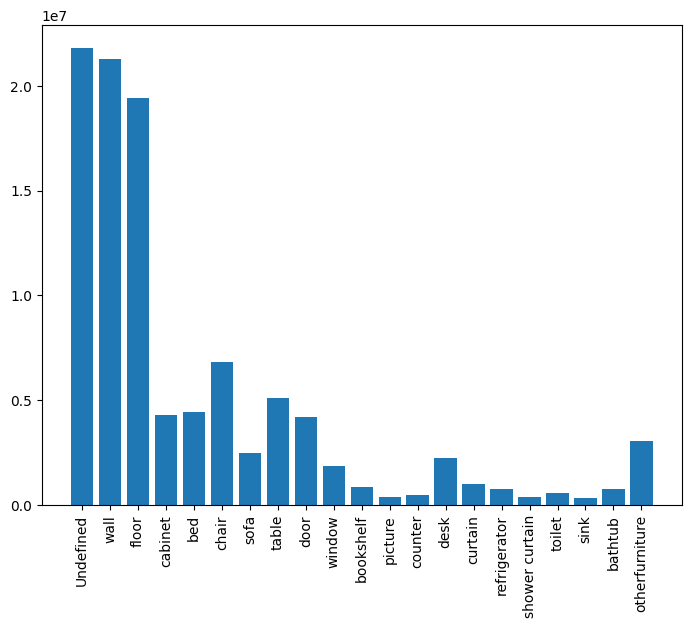

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = list(tuple('i')+CLASS_LABELS_20)
classes[0]="Undefined"
print(classes)
plt.xticks(rotation='vertical')
ax.bar(classes,class_vals)
plt.show()

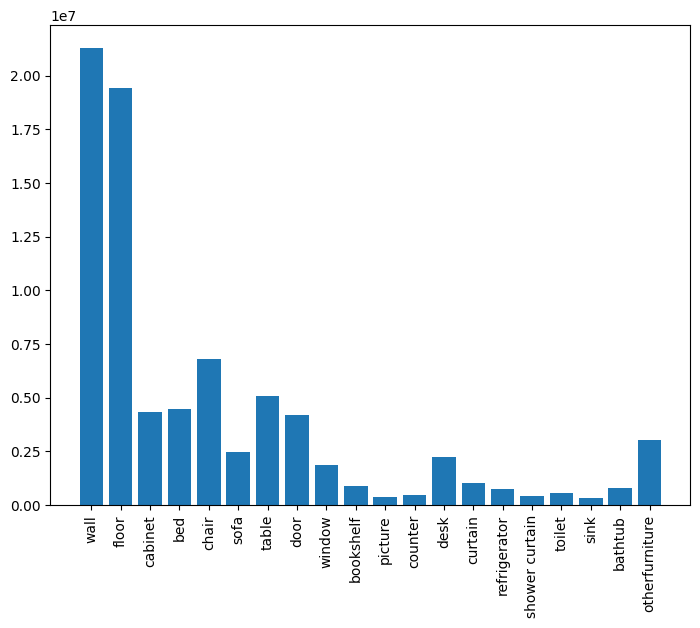

In [5]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(classes[1:],class_vals[1:])
plt.show()

In [6]:
quick_sum = {}
for i, id in enumerate(class_ids):
    quick_sum[id]=class_vals[i]
df = pd.DataFrame(quick_sum.items(), columns=["Class","Values"])
df.loc['Total'] = pd.Series(df['Values'].sum(), index=['Values'])
df['Percentage'] = df['Values']/df['Values'].sum() *200
sorted_dataset = df.sort_values(by='Values', ascending=False)
display(sorted_dataset)

,Class,Values,Percentage
Total,NaN,102619424.0,100.000000
0,0.0,21817506.0,21.260601
1,1.0,21287203.0,20.743834
2,2.0,19418541.0,18.922871
5,5.0,6807292.0,6.633532
7,7.0,5086772.0,4.956929
4,4.0,4449761.0,4.336178
3,3.0,4316951.0,4.206758
8,8.0,4212738.0,4.105205
20,39.0,3046093.0,2.968340


## Optimization Validation

In [15]:
gt_path = "/home/rozenberszki/Downloads/ScanNet-gt-124/"

class_dist = {}
class_dist[0] = {
    "sum":0,
    "scenes":{

    }
}
# for i in range(21):
#     if(i==0): continue
#     class_dist[VALID_CLASS_IDS_20[i-1]]=0
for key in VALID_CLASS_IDS_20:
    class_dist[key]={
        "sum":0,
        "scenes":{

        }
    }

scene_def = {
    "poses":[

    ]
}

for tqdm_idx in tqdm(range(len(test_scenes))):
    scene = os.path.join(gt_path, test_scenes[tqdm_idx])
    for pose in sorted(os.listdir(scene)):
        if(pose.endswith(".png")): continue
        read_pose = np.load(os.path.join(scene,pose), allow_pickle=True)
        scene_id = scene.split("/")[-1]
        pose_id = pose.split("/")[-1]
        for key in range(21):
            if(key==0): 
                sum_pts = (read_pose==key).sum()
                class_dist[key]["sum"]+=(read_pose==key).sum()
                if(sum_pts > 0):
                    if(scene_id not in class_dist[key]["scenes"]):
                        class_dist[key]["scenes"][scene_id]={
                        "sum":(read_pose==key).sum(),
                        "poses":{
                            pose_id: (read_pose==key).sum()
                        }  
                        }
                    else:
                        class_dist[key]["scenes"][scene_id]["sum"]+=(read_pose==key).sum()
                        class_dist[key]["scenes"][scene_id]["poses"][pose_id] = (read_pose==key).sum()
                continue
            new_key = VALID_CLASS_IDS_20[key-1] ## Key
            # idx = img==key
            sum_pts = (read_pose==key).sum()
            class_dist[new_key]["sum"]+= sum_pts
            if(sum_pts > 0):
                if(scene_id not in class_dist[new_key]["scenes"]):
                    class_dist[new_key]["scenes"][scene_id]={
                        "sum":(read_pose==key).sum(),
                        "poses":{
                        pose_id: (read_pose==key).sum()
                        }  
                    }
                else:
                    class_dist[new_key]["scenes"][scene_id]["sum"]+=(read_pose==key).sum()
                    class_dist[new_key]["scenes"][scene_id]["poses"][pose_id] = (read_pose==key).sum()


  0%|          | 0/312 [00:00<?, ?it/s]

In [16]:
class_ids = list(class_dist.keys())
class_vals = []
for key in class_dist.keys():
    class_vals.append(class_dist[key]["sum"])

['Undefined', 'wall', 'floor', 'cabinet', 'bed', 'chair', 'sofa', 'table', 'door', 'window', 'bookshelf', 'picture', 'counter', 'desk', 'curtain', 'refrigerator', 'shower curtain', 'toilet', 'sink', 'bathtub', 'otherfurniture']


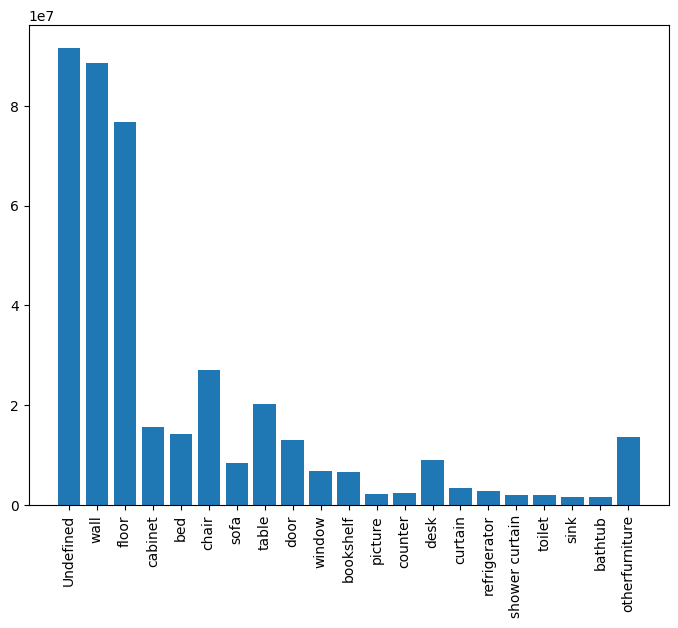

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classes = list(tuple('i')+CLASS_LABELS_20)
classes[0]="Undefined"
print(classes)
plt.xticks(rotation='vertical')
ax.bar(classes,class_vals)
plt.show()

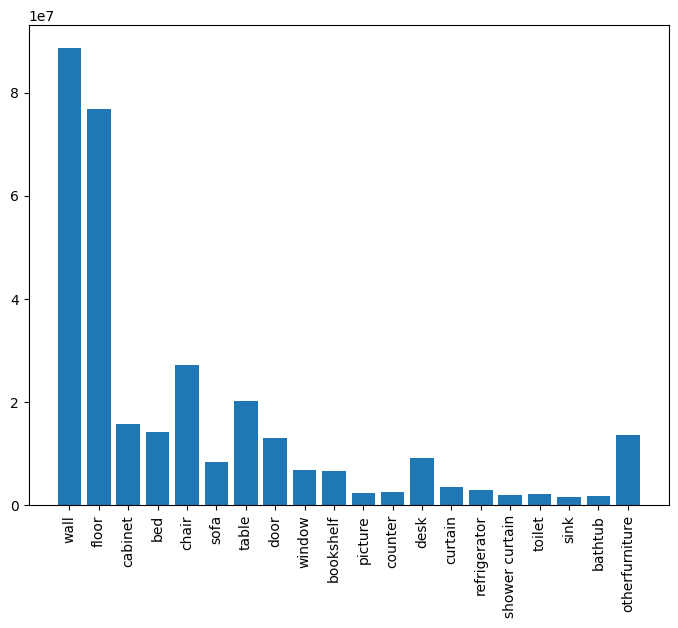

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
ax.bar(classes[1:],class_vals[1:])
plt.show()

In [19]:
quick_sum = {}
for i, id in enumerate(class_ids):
    quick_sum[id]=class_vals[i]
df = pd.DataFrame(quick_sum.items(), columns=["Class","Values"])
df.loc['Total'] = pd.Series(df['Values'].sum(), index=['Values'])
df['Percentage'] = df['Values']/df['Values'].sum() *200
sorted_dataset = df.sort_values(by='Values', ascending=False)
display(sorted_dataset)

,Class,Values,Percentage
Total,NaN,410339312.0,100.000000
0,0.0,91634665.0,22.331437
1,1.0,88701334.0,21.616582
2,2.0,76754360.0,18.705095
5,5.0,27089120.0,6.601639
7,7.0,20277904.0,4.941741
3,3.0,15686297.0,3.822762
4,4.0,14222187.0,3.465958
20,39.0,13606699.0,3.315963
8,8.0,13041242.0,3.178161
